In [4]:
from google.colab import files
uploaded = files.upload()

Saving ^GSPC.csv to ^GSPC.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [92]:
treasury = pd.read_csv('USTREASURY-YIELD.csv')
treasury.shape

(7374, 13)

In [93]:
gspc = pd.read_csv('^GSPC.csv')
gspc.shape

(7426, 7)

In [94]:
treasury.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
0,2019-06-21,2.16,2.16,2.11,2.05,1.95,1.77,1.74,1.80,1.93,2.07,2.37,2.59
1,2019-06-20,2.17,2.15,2.14,2.04,1.91,1.72,1.69,1.74,1.87,2.01,2.31,2.53
2,2019-06-19,2.14,2.18,2.18,2.11,1.96,1.74,1.70,1.77,1.89,2.03,2.32,2.54
3,2019-06-18,2.18,2.20,2.22,2.20,2.04,1.86,1.80,1.83,1.93,2.06,2.34,2.55
4,2019-06-17,2.22,2.21,2.23,2.20,2.03,1.86,1.80,1.85,1.96,2.09,2.37,2.58


In [95]:
gspc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


In [96]:
df = pd.merge(treasury, gspc, on='Date')
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Open,High,Low,Close,Adj Close,Volume
0,2019-06-21,2.16,2.16,2.11,2.05,1.95,1.77,1.74,1.80,1.93,2.07,2.37,2.59,2952.709961,2964.149902,2946.870117,2950.459961,2950.459961,5000120000
1,2019-06-20,2.17,2.15,2.14,2.04,1.91,1.72,1.69,1.74,1.87,2.01,2.31,2.53,2949.600098,2958.060059,2931.500000,2954.179932,2954.179932,3905940000
2,2019-06-19,2.14,2.18,2.18,2.11,1.96,1.74,1.70,1.77,1.89,2.03,2.32,2.54,2920.550049,2931.739990,2911.429932,2926.459961,2926.459961,3287890000
3,2019-06-18,2.18,2.20,2.22,2.20,2.04,1.86,1.80,1.83,1.93,2.06,2.34,2.55,2906.709961,2930.790039,2905.439941,2917.750000,2917.750000,3437620000
4,2019-06-17,2.22,2.21,2.23,2.20,2.03,1.86,1.80,1.85,1.96,2.09,2.37,2.58,2889.750000,2897.270020,2887.300049,2889.669922,2889.669922,2810140000


In [97]:
df = df.drop(columns=['Open','High','Low','Adj Close'])
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume
0,2019-06-21,2.16,2.16,2.11,2.05,1.95,1.77,1.74,1.80,1.93,2.07,2.37,2.59,2950.459961,5000120000
1,2019-06-20,2.17,2.15,2.14,2.04,1.91,1.72,1.69,1.74,1.87,2.01,2.31,2.53,2954.179932,3905940000
2,2019-06-19,2.14,2.18,2.18,2.11,1.96,1.74,1.70,1.77,1.89,2.03,2.32,2.54,2926.459961,3287890000
3,2019-06-18,2.18,2.20,2.22,2.20,2.04,1.86,1.80,1.83,1.93,2.06,2.34,2.55,2917.750000,3437620000
4,2019-06-17,2.22,2.21,2.23,2.20,2.03,1.86,1.80,1.85,1.96,2.09,2.37,2.58,2889.669922,2810140000


In [0]:
df = df.sort_index(ascending=0).reset_index().reindex().drop(columns='index')

In [0]:
df['ma'] = df['Close'].rolling(window=30).mean()


In [100]:
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma
0,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,359.690002,162070000,NaN
1,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,358.760010,192330000,NaN
2,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,355.670013,177000000,NaN
3,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,352.200012,158530000,NaN
4,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,353.790009,140110000,NaN


In [0]:
df=df.iloc[30:]

In [102]:
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma
30,1990-02-14,NaN,NaN,7.87,8.00,8.03,8.27,8.27,8.34,8.36,8.36,NaN,8.41,332.010010,138530000,336.578334
31,1990-02-15,NaN,NaN,7.97,8.08,8.11,8.35,8.35,8.40,8.44,8.43,NaN,8.47,334.890015,174620000,335.782667
32,1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,NaN,8.46,332.720001,166840000,335.017667
33,1990-02-20,NaN,NaN,8.06,8.20,8.24,8.52,8.52,8.58,8.63,8.62,NaN,8.66,327.989990,147300000,334.210666
34,1990-02-21,NaN,NaN,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,327.670013,159240000,333.339999


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
df = df.reset_index().reindex().drop(columns='index')

In [0]:
df['ma-1']= df.ma.shift(-1)

In [0]:
df['madifference']=df['ma'] - df['ma-1']

In [0]:
df = df.drop(columns=['ma-1'])

In [109]:
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma,madifference
0,1990-02-14,NaN,NaN,7.87,8.00,8.03,8.27,8.27,8.34,8.36,8.36,NaN,8.41,332.010010,138530000,336.578334,0.795666
1,1990-02-15,NaN,NaN,7.97,8.08,8.11,8.35,8.35,8.40,8.44,8.43,NaN,8.47,334.890015,174620000,335.782667,0.765000
2,1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,NaN,8.46,332.720001,166840000,335.017667,0.807001
3,1990-02-20,NaN,NaN,8.06,8.20,8.24,8.52,8.52,8.58,8.63,8.62,NaN,8.66,327.989990,147300000,334.210666,0.870667
4,1990-02-21,NaN,NaN,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,327.670013,159240000,333.339999,0.797333


In [110]:
data = df.drop(columns=['madifference','Date','1 MO','2 MO','20 YR']) #1 month, 2 month, and 20 yr weren't implemented until later
target = df.madifference.interpolate(method='spline',order=4) 
data = data.interpolate(method='spline',order=4)#Lack of 30yr for 2001-2006



(5500, 12) (1834, 12)


In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data,target, random_state=24)
print(Xtrain.shape,Xtest.shape)

In [85]:
target.isna().value_counts()

False    7333
True        1
Name: madifference, dtype: int64

In [88]:
from sklearn.linear_model import Ridge
clf =Ridge()

clf.fit(Xtrain,ytrain)
clf.score(Xtrain,ytrain)
y_pred = clf.predict(Xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.416e-22): result may not be accurate.
  overwrite_a=True).T


In [89]:
from sklearn.metrics import r2_score

r2 = r2_score(ytest,y_pred)
r2

0.6905130892451814

In [90]:
#our intent is to hopefully use an arima or garch model to get around the time issue
!pip install pyflux

     |████████████████████████████████| 1.3MB 2.8MB/s 
     |████████████████████████████████| 962kB 36.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [0]:
sigma = df.madifference.std()

In [0]:
for value in df.madifference:
  if value > sigma:
    df['extreme']=1
  else: 
    df['extreme']=0

In [137]:
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma,madifference,extreme,close_difference,extreme_close
0,1990-02-14,NaN,NaN,7.87,8.00,8.03,8.27,8.27,8.34,8.36,8.36,NaN,8.41,332.010010,138530000,336.578334,0.795666,0,-2.880005,0
1,1990-02-15,NaN,NaN,7.97,8.08,8.11,8.35,8.35,8.40,8.44,8.43,NaN,8.47,334.890015,174620000,335.782667,0.765000,0,2.170014,0
2,1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,NaN,8.46,332.720001,166840000,335.017667,0.807001,0,4.730011,0
3,1990-02-20,NaN,NaN,8.06,8.20,8.24,8.52,8.52,8.58,8.63,8.62,NaN,8.66,327.989990,147300000,334.210666,0.870667,0,0.319977,0
4,1990-02-21,NaN,NaN,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,327.670013,159240000,333.339999,0.797333,0,1.970001,0


In [138]:
df.extreme.unique()

array([0])

In [123]:
df['close_difference']=df.Close - df.Close.shift(-1)
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma,madifference,extreme,close_difference
0,1990-02-14,NaN,NaN,7.87,8.00,8.03,8.27,8.27,8.34,8.36,8.36,NaN,8.41,332.010010,138530000,336.578334,0.795666,0,-2.880005
1,1990-02-15,NaN,NaN,7.97,8.08,8.11,8.35,8.35,8.40,8.44,8.43,NaN,8.47,334.890015,174620000,335.782667,0.765000,0,2.170014
2,1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,NaN,8.46,332.720001,166840000,335.017667,0.807001,0,4.730011
3,1990-02-20,NaN,NaN,8.06,8.20,8.24,8.52,8.52,8.58,8.63,8.62,NaN,8.66,327.989990,147300000,334.210666,0.870667,0,0.319977
4,1990-02-21,NaN,NaN,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,327.670013,159240000,333.339999,0.797333,0,1.970001


In [130]:
for value in df.close_difference:
  if value > df.close_difference.std():
    df['extreme_close']=1
  else: 
    df['extreme_close']=0
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma,madifference,extreme,close_difference,extreme_close
0,1990-02-14,NaN,NaN,7.87,8.00,8.03,8.27,8.27,8.34,8.36,8.36,NaN,8.41,332.010010,138530000,336.578334,0.795666,0,-2.880005,0
1,1990-02-15,NaN,NaN,7.97,8.08,8.11,8.35,8.35,8.40,8.44,8.43,NaN,8.47,334.890015,174620000,335.782667,0.765000,0,2.170014,0
2,1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,NaN,8.46,332.720001,166840000,335.017667,0.807001,0,4.730011,0
3,1990-02-20,NaN,NaN,8.06,8.20,8.24,8.52,8.52,8.58,8.63,8.62,NaN,8.66,327.989990,147300000,334.210666,0.870667,0,0.319977,0
4,1990-02-21,NaN,NaN,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,327.670013,159240000,333.339999,0.797333,0,1.970001,0


In [140]:
df.head(20)

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma,madifference,extreme,close_difference,extreme_close
0,1990-02-14,NaN,NaN,7.87,8.00,8.03,8.27,8.27,8.34,8.36,8.36,NaN,8.41,332.010010,138530000,336.578334,0.795666,0,-2.880005,0
1,1990-02-15,NaN,NaN,7.97,8.08,8.11,8.35,8.35,8.40,8.44,8.43,NaN,8.47,334.890015,174620000,335.782667,0.765000,0,2.170014,0
2,1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,NaN,8.46,332.720001,166840000,335.017667,0.807001,0,4.730011,0
3,1990-02-20,NaN,NaN,8.06,8.20,8.24,8.52,8.52,8.58,8.63,8.62,NaN,8.66,327.989990,147300000,334.210666,0.870667,0,0.319977,0
4,1990-02-21,NaN,NaN,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,327.670013,159240000,333.339999,0.797333,0,1.970001,0
5,1990-02-22,NaN,NaN,7.99,8.15,8.17,8.45,8.48,8.48,8.57,8.54,NaN,8.56,325.700012,184320000,332.542667,0.772000,0,1.550018,0
6,1990-02-23,NaN,NaN,7.93,8.09,8.11,8.43,8.45,8.47,8.56,8.53,NaN,8.56,324.149994,148490000,331.770667,0.662000,0,-4.520019,0
7,1990-02-26,NaN,NaN,7.97,8.09,8.10,8.38,8.40,8.40,8.49,8.46,NaN,8.49,328.670013,148900000,331.108667,0.322333,0,-1.589997,0
8,1990-02-27,NaN,NaN,7.99,8.10,8.06,8.34,8.34,8.34,8.43,8.41,NaN,8.45,330.260010,152590000,330.786334,0.295333,0,-1.630005,0
9,1990-02-28,NaN,NaN,8.04,8.14,8.12,8.43,8.45,8.44,8.54,8.51,NaN,8.54,331.890015,184400000,330.491001,0.155333,0,-0.849975,0


In [0]:
df['ma_diff_week'] = df.madifference.rolling(window=5).sum()
df['ma_diff_month'] = df.madifference.rolling(window=30).sum()


In [168]:
df.head(20)

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma,madifference,extreme,close_difference,extreme_close,ma_diff_week,ma_diff_month
0,1990-02-14,NaN,NaN,7.87,8.00,8.03,8.27,8.27,8.34,8.36,8.36,NaN,8.41,332.010010,138530000,336.578334,0.795666,False,-2.880005,0,NaN,NaN
1,1990-02-15,NaN,NaN,7.97,8.08,8.11,8.35,8.35,8.40,8.44,8.43,NaN,8.47,334.890015,174620000,335.782667,0.765000,False,2.170014,0,NaN,NaN
2,1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,NaN,8.46,332.720001,166840000,335.017667,0.807001,False,4.730011,0,NaN,NaN
3,1990-02-20,NaN,NaN,8.06,8.20,8.24,8.52,8.52,8.58,8.63,8.62,NaN,8.66,327.989990,147300000,334.210666,0.870667,False,0.319977,0,NaN,NaN
4,1990-02-21,NaN,NaN,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,327.670013,159240000,333.339999,0.797333,False,1.970001,0,4.035667,NaN
5,1990-02-22,NaN,NaN,7.99,8.15,8.17,8.45,8.48,8.48,8.57,8.54,NaN,8.56,325.700012,184320000,332.542667,0.772000,False,1.550018,0,4.012001,NaN
6,1990-02-23,NaN,NaN,7.93,8.09,8.11,8.43,8.45,8.47,8.56,8.53,NaN,8.56,324.149994,148490000,331.770667,0.662000,False,-4.520019,0,3.909000,NaN
7,1990-02-26,NaN,NaN,7.97,8.09,8.10,8.38,8.40,8.40,8.49,8.46,NaN,8.49,328.670013,148900000,331.108667,0.322333,False,-1.589997,0,3.424332,NaN
8,1990-02-27,NaN,NaN,7.99,8.10,8.06,8.34,8.34,8.34,8.43,8.41,NaN,8.45,330.260010,152590000,330.786334,0.295333,False,-1.630005,0,2.848998,NaN
9,1990-02-28,NaN,NaN,8.04,8.14,8.12,8.43,8.45,8.44,8.54,8.51,NaN,8.54,331.890015,184400000,330.491001,0.155333,False,-0.849975,0,2.206999,NaN


In [0]:
def check_extreme(row,sigma):
  if row['ma_diff_week'] > sigma:
    return 1
  else:
    return 0

In [0]:
import math

In [179]:
df['extreme'] = abs(df['ma_diff_week']) > 3*math.sqrt(5)*sigma
df.extreme.unique()

array([False,  True])

In [0]:
df = df.drop(columns=['close_difference','extreme_close'])

In [185]:
df['extreme_diff']=df['madifference']>3*sigma
df['extreme_diff'].unique()

array([False,  True])

In [191]:
df[df['extreme_diff']==True]

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma,madifference,extreme,ma_diff_week,ma_diff_month,extreme_diff
2136,1998-08-28,NaN,NaN,4.91,5.01,4.96,4.93,4.89,4.94,5.09,5.09,5.51,5.37,1027.140015,840300000,1102.329659,7.560665,True,23.439335,41.151335,True
2770,2001-03-13,NaN,NaN,4.66,4.57,4.43,4.46,4.53,4.75,4.97,4.95,5.50,5.34,1197.660034,1360900000,1288.583675,6.900667,True,25.732332,43.885661,True
2772,2001-03-15,NaN,NaN,4.52,4.42,4.19,4.22,4.31,4.55,4.82,4.81,5.43,5.29,1173.560059,1259500000,1275.268009,7.431331,True,32.123661,61.218323,True
2774,2001-03-19,NaN,NaN,4.53,4.40,4.25,4.32,4.40,4.58,4.83,4.82,5.44,5.30,1170.810059,1126200000,1261.881348,7.056335,True,33.758663,78.677991,True
2775,2001-03-20,NaN,NaN,4.49,4.34,4.18,4.24,4.33,4.52,4.78,4.78,5.41,5.27,1142.619995,1235900000,1254.825012,7.670666,True,34.528662,88.928658,True
2776,2001-03-21,NaN,NaN,4.31,4.29,4.14,4.21,4.29,4.49,4.76,4.77,5.42,5.28,1122.140015,1346300000,1247.154346,7.443669,True,35.557332,97.536996,True
2897,2001-09-18,2.34,NaN,2.48,2.56,2.69,2.96,3.31,4.01,4.46,4.72,5.59,5.55,1032.739990,1650410000,1157.550012,6.661003,True,25.816667,58.841321,True
2898,2001-09-19,2.00,NaN,2.19,2.33,2.49,2.81,3.18,3.90,4.41,4.69,5.59,5.56,1016.099976,2120550000,1150.889010,7.873667,True,29.785333,66.635321,True
2899,2001-09-20,2.04,NaN,2.22,2.38,2.56,2.91,3.27,3.97,4.47,4.75,5.67,5.62,984.539978,2004800000,1143.015342,8.285000,True,34.294336,74.163985,True
2900,2001-09-21,2.12,NaN,2.25,2.34,2.53,2.91,3.27,3.94,4.43,4.70,5.62,5.59,965.799988,2317300000,1134.730343,6.567666,True,35.337002,79.902651,True


In [0]:
df = df.rename(columns={'extreme_diff':'extreme_daily'}).drop(columns='extreme')

In [0]:
df['Date']=pd.to_datetime(df.Date, infer_datetime_format=True)

In [195]:
df.dtypes

Date             datetime64[ns]
1 MO                    float64
2 MO                    float64
3 MO                    float64
6 MO                    float64
1 YR                    float64
2 YR                    float64
3 YR                    float64
5 YR                    float64
7 YR                    float64
10 YR                   float64
20 YR                   float64
30 YR                   float64
Close                   float64
Volume                    int64
ma                      float64
madifference            float64
extreme                    bool
ma_diff_week            float64
ma_diff_month           float64
extreme_diff               bool
dtype: object

In [0]:
grouped = df.groupby(pd.Grouper(key='Date',freq='M'))['madifference'].sum().reset_index(name='difference')

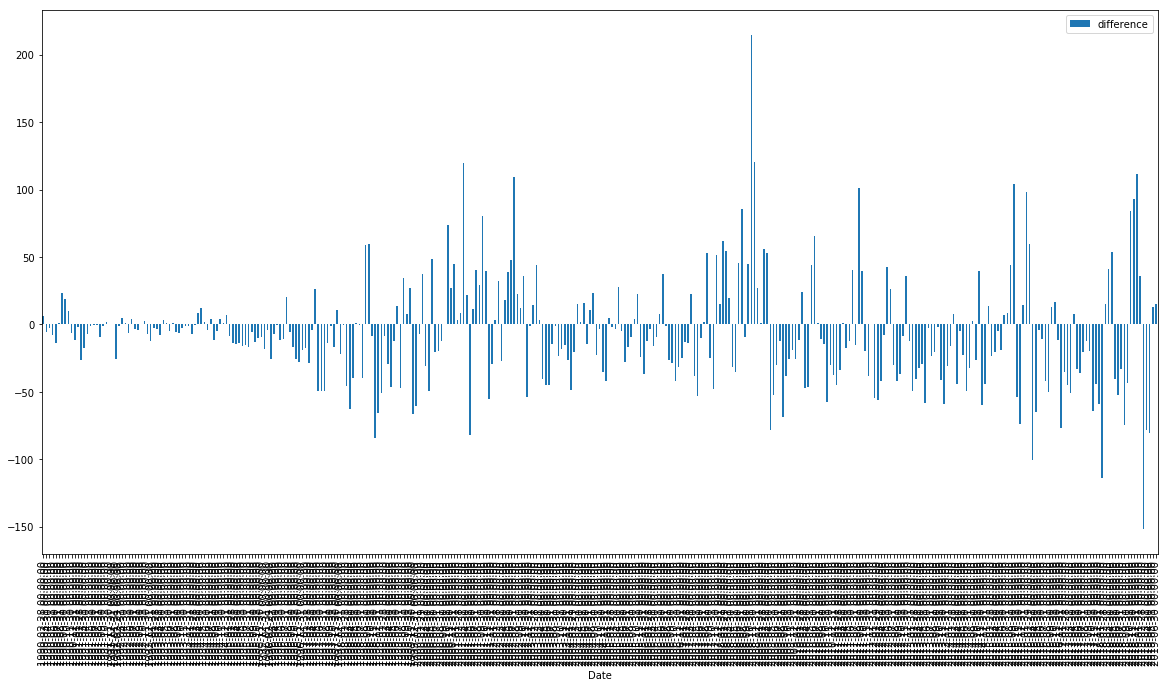

In [216]:
grouped.plot(x='Date',y='difference',kind='bar',figsize=(20,10))

In [221]:
df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,Close,Volume,ma,madifference,ma_diff_week,ma_diff_month,extreme_daily
0,1990-02-14,NaN,NaN,7.87,8.00,8.03,8.27,8.27,8.34,8.36,8.36,NaN,8.41,332.010010,138530000,336.578334,0.795666,NaN,NaN,False
1,1990-02-15,NaN,NaN,7.97,8.08,8.11,8.35,8.35,8.40,8.44,8.43,NaN,8.47,334.890015,174620000,335.782667,0.765000,NaN,NaN,False
2,1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,NaN,8.46,332.720001,166840000,335.017667,0.807001,NaN,NaN,False
3,1990-02-20,NaN,NaN,8.06,8.20,8.24,8.52,8.52,8.58,8.63,8.62,NaN,8.66,327.989990,147300000,334.210666,0.870667,NaN,NaN,False
4,1990-02-21,NaN,NaN,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,327.670013,159240000,333.339999,0.797333,4.035667,NaN,False


In [0]:
data=df.drop(columns=['1 MO','2 MO','20 YR','extreme_daily','Date'])
target = df['extreme_daily']



In [0]:
def split(target, features):
    """
    Temporal Train Test Split. Holdout is most recent data.  
    """
    
    X = df[features]
    y = df[target]
    
    X_train = X[:int(len(X.index)*.7)]
    X_test= X[int(len(X.index)*.7):len(X.index)]
    y_train=y[:int(len(y.index)*.7)]
    y_test=y[int(len(y.index)*.7):len(y.index)]
    
    return X_train, X_test, y_train, y_test


In [0]:
features= ['3 MO','6 MO','1 YR','2 YR','3 YR','5 YR','7 YR','10 YR','30 YR']
target='extreme_daily'

In [0]:

X_train, X_test, y_train, y_test = split(target,features)

X_train = X_train.interpolate(method='spline',order=4)
X_test = X_test.interpolate(method='spline',order=4)

In [248]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
modelxgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx', 
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 14, colsample_bytree = .4)


modelxgb.fit(X_train,y_train)
y_pred = modelxgb.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.983643798273512

In [249]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9627442071785552

In [250]:
modelr = LogisticRegression()

modelr.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9627442071785552